## import

In [1]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn import linear_model
import pandas as pd
from matplotlib import pyplot as plt

df2019 = pd.read_excel('2019.xlsx', index_col=None, skiprows = range(0,2))
df2020 = pd.read_excel('2020.xlsx', index_col=None, skiprows = range(0,2))

## Submitted Ads

In [2]:
df19 = df2019.groupby(['회차']).count()
df20 = df2020.groupby(['회차']).count()
df=pd.concat([df19['접수번호'],df20['접수번호']])
df = df.to_frame().reset_index()
df = df.rename(columns= {'접수번호': '수'})
original_df = pd.DataFrame()
original_df = df.copy()
## Remove outliers
min_thr, max_thr = df['수'].quantile([0.025, 0.975])
df = df.loc[ (df['수'] < max_thr) & (df['수'] > min_thr) ]
##

count = df['수'].count()
df['XX'] = [i+1 for i in range(count)]
df = df.drop(['회차'],axis='columns')

## Plot Submitted Ads

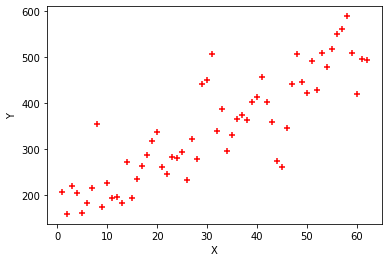

In [3]:
Xx = df.XX
Yy = df.수

%matplotlib inline
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df.XX,df.수,color='red',marker='+')




## Linear model

In [4]:
X = df.drop('수',axis='columns')
y = df.수

lin = linear_model.LinearRegression()

lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

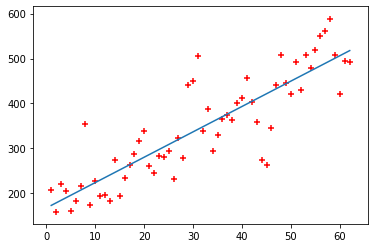

In [5]:
coef = lin.coef_
intercept = lin.intercept_

plt.plot(X, X*coef+intercept, '-', label='fit')
plt.scatter(df.XX,df.수,color='red',marker='+')

## EMA

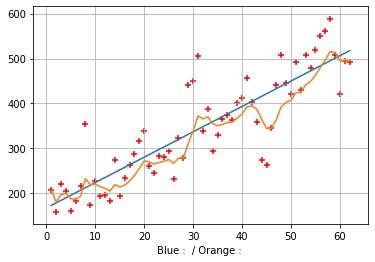

In [6]:
df2 = pd.DataFrame()
df2['ema4'] = df['수'].ewm(4).mean()
df2['XX'] = df['XX']
df2
plt.xlabel('Blue :  / Orange : ')
plt.plot(X, X*coef+intercept, '-', label='fit')
plt.scatter(df.XX,df.수,color='red',marker='+')
plt.plot(df2.XX,df2.ema4)
plt.grid()

## EMA linear

In [7]:
X2 = df2.drop('ema4',axis='columns')
y2 = df2.ema4
lin2 = linear_model.LinearRegression()
lin2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(lin.predict([[69]]))
print(lin2.predict([[69]]))

[557.2809549]
[527.5795362]


## Monday to Thursday

In [9]:
df2019['weekday'] = df2019['제출일시'].dt.weekday
df2020['weekday'] = df2020['제출일시'].dt.weekday

l_m_t = []
l_m_t2 = []


nlist = [n for n, df in df2019.groupby(['회차'])]

for n in nlist:
    mon = df2019.loc[(df2019['weekday'] == 0) & (df2019['회차'] == n) ]
    tue = df2019.loc[(df2019['weekday'] == 1) & (df2019['회차'] == n) ]
    wed = df2019.loc[(df2019['weekday'] == 2) & (df2019['회차'] == n) ]
    thu = df2019.loc[(df2019['weekday'] == 3) & (df2019['회차'] == n) ]
    m_t= len(mon) + len(tue) + len(wed) + len(thu)
    l_m_t.append(m_t)
    
    
mlist = [m for m, df in df2020.groupby(['회차'])]

for m in mlist:
    mon2 = df2020.loc[(df2020['weekday'] == 0) & (df2020['회차'] == m) ]
    tue2 = df2020.loc[(df2020['weekday'] == 1) & (df2020['회차'] == m) ]
    wed2 = df2020.loc[(df2020['weekday'] == 2) & (df2020['회차'] == m) ]
    thu2 = df2020.loc[(df2020['weekday'] == 3) & (df2020['회차'] == m) ]
    m_t2 = len(mon2) + len(tue2) + len(wed2) + len(thu2)
    l_m_t2.append(m_t2)
    
lst = l_m_t + l_m_t2
# print(lst)

In [10]:
count2 = original_df['수'].count()
original_df['XX'] = [i+1 for i in range(count2)]
# original_df

In [11]:
df3 = pd.DataFrame()

df3['M_T'] = lst
df3['XX'] = original_df['XX']
df3['Y'] = original_df['수']
df3

XXX = df3.drop('Y',axis='columns')
YYY = df3.Y

In [12]:
lin3 = linear_model.LinearRegression()
lin3.fit(XXX,YYY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin3.predict([[144,69]])

array([546.21090663])

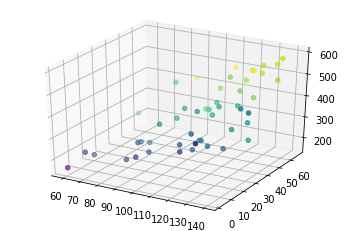

In [14]:
df4 = df3.copy()
min_thr4, max_thr4 = df4.M_T.quantile([0.11, 0.89])
df4 = df4.loc[ (df4.M_T < max_thr4) & (df4.M_T > min_thr4) ]
df4.reset_index(inplace=True)

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = df4.Y
xline = df4.M_T
yline = df4.XX
ax.scatter3D(xline, yline, zline, c=yline)


In [15]:
df4
df4.drop(columns='index', inplace=True)

In [16]:
lin4 = linear_model.LinearRegression()
lin4.fit(df4.drop(columns = 'Y'),df4.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin4.predict([[144,52]])

array([487.53007298])